In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom
from scipy.stats import poisson

In [16]:
die_distribution = stats.randint(1, 7)




In [22]:
die_distribution.rvs()

6

In [13]:
die_distribution.rvs(5)

array([2, 4, 4, 1, 4])

In [23]:
die_distribution.rvs((5, 5))


array([[4, 2, 3, 6, 5],
       [2, 1, 1, 1, 6],
       [2, 3, 4, 4, 2],
       [1, 6, 1, 1, 1],
       [5, 1, 1, 1, 2]])

Text(0.5, 1.0, 'Outcome of 10,000 Dice Rolls')

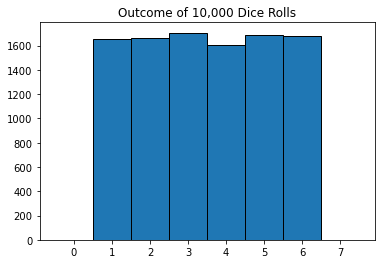

In [24]:
n = 10_000

x = die_distribution.rvs(n)

plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of {n:,} Dice Rolls')


In [27]:
die_distribution.pmf(2)


0.16666666666666666

In [28]:
die_distribution.pmf([1, 2, 3])


array([0.16666667, 0.16666667, 0.16666667])

In [61]:
die_distribution.cdf(5)

0.8333333333333334

In [63]:
5/6

0.8333333333333334

In [40]:
die_distribution.ppf(5/6)


5.0

In [52]:
die_distribution.sf(4)


0.33333333333333337

In [60]:
die_distribution.isf(1/3)


4.0

Text(0, 0.5, 'P(X)')

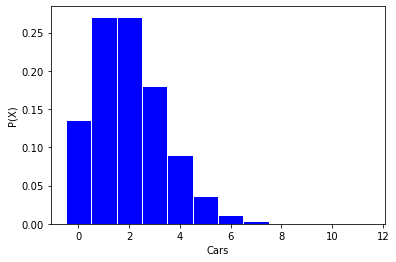

In [19]:
cars = stats.poisson(2)

x = np.arange(0,12)
y = cars.pmf(x)

plt.bar(x, y, color='blue', edgecolor='white', width=1)
plt.xlabel('Cars')
plt.ylabel('P(X)')

In [20]:
# What is the probability that no cars drive up in the noon hour?

avg = 2

stats.poisson(avg).pmf(0)

cars = stats.poisson(2)

(cars.rvs(10_000) == 0).mean()


0.1278

In [21]:
# What is the probability that 3 or more cars come through the drive through?

estimated = cars.sf(2)
simulated = (cars.rvs(10_000) >= 3).mean()

estimated, simulated

(0.32332358381693654, 0.3241)

In [22]:
# How likely is it that the drive through gets at least 1 car?


estimated = cars.sf(0)
simulated = (cars.rvs(10_000) > 0).mean()

estimated, simulated

(0.8646647167633873, 0.8661)

In [23]:
trials = cols = 100_000

samples = rows = 1000

mean = 3.0

std = .3

grades = np.random.normal(mean,std,trials * samples).reshape(rows, cols)

grades = pd.DataFrame(grades)



In [24]:
grades

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,2.810294,3.164460,2.823419,3.096177,2.930330,3.017793,3.029724,3.510251,3.448770,2.950380,...,3.095228,2.729045,2.642665,2.757642,2.777992,3.063398,3.729435,3.062659,3.315946,3.124978
1,2.741922,3.040460,2.829056,2.860802,3.298287,2.745653,3.013536,3.055761,3.243326,2.923996,...,3.239238,3.013938,2.731042,3.006314,3.041677,2.467119,3.361240,2.834595,2.803958,3.106929
2,2.408860,3.250370,2.494851,2.865873,3.127899,2.782734,2.552128,3.137128,2.433791,3.060607,...,3.022710,3.287468,3.356771,3.395506,3.231131,2.682374,3.479173,2.752997,2.889920,2.671445
3,2.854834,2.705768,2.809176,3.444977,2.451680,3.446887,2.995362,3.027001,2.624913,2.926247,...,2.746832,2.748512,3.167533,3.057918,2.865139,3.282742,2.955608,3.223637,3.156970,2.474216
4,2.569081,3.225386,3.514250,3.406731,2.539840,2.458728,2.699906,2.792314,3.223697,3.126655,...,3.093067,3.130013,3.181015,3.070338,2.623719,3.281848,2.959511,3.287767,2.791206,3.646145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.123163,2.875250,3.119076,3.370765,2.890131,3.456945,2.850025,2.529132,3.179529,2.946756,...,3.071774,2.959217,3.136409,3.495125,3.097314,2.722947,2.938047,3.203995,3.067974,2.424311
996,2.551434,2.957189,2.877095,2.667601,2.877148,3.296641,3.122001,2.935880,2.980727,2.899917,...,2.948383,3.040636,3.737176,2.806878,3.099262,2.694050,2.991723,3.206489,3.008293,3.203374
997,2.948224,3.097292,2.713357,2.854712,3.727990,2.720324,3.091422,3.023676,3.393773,2.994726,...,3.557856,2.832072,3.121779,3.831909,3.308557,2.764454,3.586705,3.319066,2.889084,3.177826
998,2.517667,3.357240,3.311103,3.004878,2.621762,2.698650,2.539442,3.476062,3.198252,3.214697,...,3.386740,3.278946,3.132987,3.259488,3.136561,2.850485,2.993478,2.445264,2.278049,3.315282


In [25]:
grades = grades.apply(lambda x: x.sort_values().values)

grades = grades.loc[[95]].mean(axis=0)



In [26]:
grades.head()

0    2.595713
1    2.623330
2    2.602704
3    2.623527
4    2.587529
dtype: float64

In [27]:
top_five_percent = grades.mean(axis=0)

top_five_percent



2.6079554847520163

In [28]:
# What grade point average is required to be in the top 5% of the graduating class?

stats.norm(3,.3).isf(.05)

3.4934560880854417

In [29]:
# What GPA constitutes the bottom 15% of the class?

stats.norm(3,.3).ppf(.15)

2.689069983151863

In [30]:
trials = cols = 100_000

samples = rows = 1000

mean = 3.0  

std = .3

grades = np.random.normal(mean,std,trials * samples).reshape(rows, cols)

grades = pd.DataFrame(grades)

grades = grades.apply(lambda x: x.sort_values().values)

lower_range = grades.loc[[50]].mean(axis=0)

lower_range_mean = lower_range.mean()

lower_range_mean

upper_range = grades.loc[[89]].mean(axis=0)

upper_range_mean = upper_range.mean()

upper_range_mean

print("The range is between " + str(lower_range_mean) + " and " + str(upper_range_mean))



The range is between 2.5081378016029197 and 2.5968930498834837


In [31]:
grades = norm(mean,std)

lower = dist.ppf(.21)

upper = dist.ppf(.30)

print("The range is between " + str(lower) + " and " + str(upper))



NameError: name 'dist' is not defined

In [ ]:
# If I have a GPA of 3.5, what percentile am I in?

trials = cols = 100_000

samples = rows = 1000

mean = 3.0  

std = .3

grades = np.random.normal(mean, std,trials * samples).reshape(rows, cols)

grades = pd.DataFrame(grades)

(grades >= 3.5).sum(axis=1).mean()

grades = norm(mean, std)

grades.cdf(3.5)



In [ ]:
stats.norm(3,.3).cdf(3.5)

In [ ]:
(np.random.normal(3,.3, 1000000)< 3.5).mean()

In [34]:
trials = cols = 100_000

samples = rows = 1000

rate = .02 

visitors = 4326

clicks = binom(n, rate)

clicks.sf(96)

0.13975823631416445

In [32]:
# binom distribution

n = 4326
p = 0.02

stats.binom(n,p).sf(96)

0.13975823631416445

In [33]:
# How likely is it that this many people or more click through?

trials = rows = 100_000

samples = cols = 4326

data = np.random.uniform(1,101, samples * trials).reshape(rows,cols)

data = pd.DataFrame(data)

(((data < 3).sum(axis=1)) >= 97).sum() / trials

0.13945

In [39]:
# Using poisson appox

𝜆 = n * p

stats.poisson(𝜆).sf(96)

0.14211867659283192

In [40]:
n = 60
p = .01

stats.binom(n,p).sf(0)

0.45284335760923855

In [41]:
trials = rows = 100_000

samples =  cols = 60

answers = np.random.uniform(1,101, trials * samples).reshape(rows, cols)

answers = pd.DataFrame(answers)

answers.head()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,96.253452,62.757069,40.142981,69.163993,50.841184,95.406471,6.354248,12.010283,65.292732,82.820283,...,88.575584,4.651052,70.272635,54.813610,83.718608,76.360903,34.016705,55.177919,23.198245,91.794302
1,2.629936,65.371483,76.391349,94.303207,35.681682,4.563115,78.210715,94.992863,47.004137,52.831466,...,22.289092,36.462429,36.274236,42.093661,90.927220,32.379016,46.029676,52.662224,97.229872,85.692053
2,9.812511,50.586957,63.506835,2.091365,47.274988,47.168109,48.586209,93.769075,94.112211,6.843430,...,39.879841,72.910100,14.574996,28.213642,92.900342,77.666207,94.530146,16.432043,34.339560,6.831713
3,3.872918,96.288698,72.612410,6.417324,26.513371,21.413180,3.848833,92.629927,24.115286,30.937412,...,73.041167,71.400297,96.198021,84.509041,37.687151,44.834683,3.801112,63.575658,56.113665,4.458661
4,17.888137,35.170874,52.315295,92.011417,19.274170,40.146565,33.598432,77.999656,95.621051,92.168739,...,6.714682,59.583488,35.758634,57.351311,92.363932,11.578698,96.757676,54.913116,7.191137,19.970514


In [42]:
binom = binom(60, .01)

binom.sf(0)

0.45284335760923855

In [43]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom
from scipy.stats import poisson
import matplotlib.pyplot as plt


In [44]:
# many students will visit the break area on a given day

trials = rows = 100_000

samples =  cols = 59

data = np.random.uniform(1,101, trials * samples).reshape(rows, cols)

data = pd.DataFrame(data)

(((data < 4).sum(axis=1)) > 0).sum() / trials

0.83484

In [46]:
n = 59

p = .03

dist = binom(n,p)

dist.sf(0)

0.8342199288437352

In [47]:
# How likely is it that it goes two days without getting cleaned up? 

trials = rows = 100_000

samples =  cols = 59

data = np.random.uniform(1,101, trials * samples).reshape(rows, cols)

data = pd.DataFrame(data)

exp = (((data < 4).sum(axis=1)) > 0).sum() / trials

(1-exp)**2

0.027420048100000004

In [48]:
stats.binom(n * 2, p).pmf(0)

0.027483031992576134

In [49]:
n = 59

p = .03

dist = binom(n,p)

calc = dist.sf(0)

(1-calc)**2

0.027483031992576224

In [50]:
# All week?
trials = rows = 100_000

samples =  cols = 59

data = np.random.uniform(1,101, trials * samples).reshape(rows, cols)

data = pd.DataFrame(data)

exp = (((data < 4).sum(axis=1)) > 0).sum() / trials

(1-exp)**7

3.566747456659378e-06

In [51]:
n = 59

p = .03

dist = binom(n,p)

c = dist.sf(0)

(1-c)**7

3.44132945698801e-06

In [73]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [55]:

trials = rows = 100_000

samples = cols = 1

mean = 15

std = 3

people = np.random.normal(mean,std,trials * samples)

(people <= 17).sum()/trials

0.74722

In [57]:
mean = 15

std = 3

binom = norm(mean,std)

binom.cdf(17)

0.7475074624530771

In [78]:
from env import get_db_url
import pandas as pd
import numpy as np

In [79]:
url = get_db_url("employees")
sql = """
SELECT * FROM employees
"""

employees = pd.read_sql(sql, url)
employees.shape

(300024, 6)

In [85]:
url = get_db_url("employees")
sql = """
SELECT * FROM salaries
"""

salaries = pd.read_sql(sql, url)
salaries.shape

(2844047, 4)

In [86]:
# What percent of employees earn less than 60,000?

μ, σ = salaries.salary.mean(), salaries.salary.std()
dist = stats.norm(μ, σ)

dist.cdf(60_000)

0.41082494791346336

In [87]:
# What percent of employees earn more than 95,000?

dist.sf(95_000)

0.03251945131024514

In [88]:
# What percent of employees earn between 65,000 and 80,000?

((salaries.salary > 65_000) & (salaries.salary < 80_000)).mean()

0.24327375743087226

In [89]:
# What do the top 5% of employees make?

salaries.salary.quantile(.95)

95761.0

<AxesSubplot:>

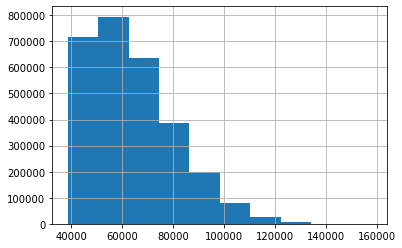

In [90]:
salaries.salary.hist()